In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics

In [2]:
result = pd.read_csv('../result/07_large_xgb_time_result.csv',index_col = 0)

In [3]:
# start evaluation
# risk_thr1 = np.arange(0,1e-9,1e-10)
# risk_thr2 = np.arange(1e-3,0.1,1e-3)
# risk_thr3 = np.arange(1-1e-9,1+1e-9,1e-10)
# risk_thr = np.concatenate([risk_thr1,risk_thr2,risk_thr3])
TPRs= []
FNRs= []
FNR1 = 0.001
FNR2 = 0.005
FNR3=0.01
model_score = 0
min1 = min2 = min3 = 1
for thr in np.arange(0,1+0.001,0.001):
    tmp_result = result.copy()
    tmp_result.loc[tmp_result['score']>=thr,'score'] = 1
    tmp_result.loc[tmp_result['score']<thr,'score']=0
    TR = tmp_result.loc[(tmp_result['score']==1) & (tmp_result['truth']==1)].shape[0]
    FN = tmp_result.loc[(tmp_result['score']==0)&(tmp_result['truth']==1)].shape[0]
    TN = tmp_result.loc[(tmp_result['score']==0) & (tmp_result['truth']==0)].shape[0]
    FP = tmp_result.loc[(tmp_result['score']==1) & (tmp_result['truth']==0)].shape[0]
    TPR = TR/(TR+FN)
    FNR = FP/(TN+FP)
    TPRs.append(TPR)
    FNRs.append(FNR)
    if abs(FNR-FNR1)<min1:
        min1 = abs(FNR-FNR1)
        FNR11 = FNR
        TPR1 = TPR
    if abs(FNR-FNR2)<min2:
        min2 = abs(FNR-FNR2)
        FNR22 = FNR
        TPR2 = TPR
    if abs(FNR-FNR3)<min3:
        min3 = abs(FNR-FNR3)
        FNR33 = FNR
        TPR3 = TPR
    del tmp_result
print((FNR11,TPR1),(FNR22,TPR2),(FNR33,TPR3))
print(0.4*TPR1+0.3*TPR2+0.3*TPR3)

(0.0009826158872612038, 0.23402948402948404) (0.004933550600623961, 0.538083538083538) (0.010075907077290927, 0.7027027027027027)
0.46584766584766585


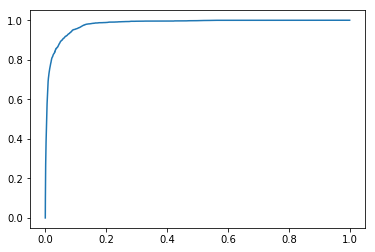

In [5]:
import matplotlib.pyplot as plt
# thr-FNR 折线图
plt.plot(FNRs,TPRs)
plt.show()

In [19]:
# compare difference of different final submission results
# sgd_result = pd.read_csv('./result/large_default_sgd_filt_nonlabel_sgd_notime.csv')
lr_result = pd.read_csv('./result/wb_lr_notime.csv')

In [6]:
sgd_result.describe()

,score,truth
count,1.980020e+05,198002.000000
mean,7.172574e-03,0.012293
std,8.311866e-02,0.110190
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,7.772760e-305,0.000000
75%,1.361674e-206,0.000000
max,1.000000e+00,1.000000


In [20]:
lr_result.describe()

,score,truth
count,1.980020e+05,198002.000000
mean,1.226358e-01,0.012293
std,2.366846e-01,0.110190
min,3.048094e-43,0.000000
25%,1.194940e-03,0.000000
50%,1.099494e-02,0.000000
75%,9.748557e-02,0.000000
max,1.000000e+00,1.000000


In [62]:
sgd_result[sgd_result['score']>=0.7].shape[0]

1386

In [44]:
lr_result[lr_result['score']==1].shape[0]

14

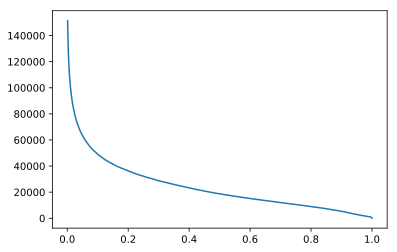

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sgdx = []
lrx = []
for thr in np.arange(0.001,1+0.001,0.001):
#     sgd_ones = sgd_result.loc[sgd_result['score']>thr]
    lr_ones = lr_result[lr_result['score']>thr]
#     sgdx.append(sgd_ones.shape[0])
    lrx.append(lr_ones.shape[0])
# plt.plot(np.arange(0.001,1+0.001,0.001),sgdx)
plt.plot(np.arange(0.001,1+0.001,0.001),lrx)

In [9]:
plt.plot(np.arange(0,size),lr_result['score'].sort_values())

NameError: name 'plt' is not defined

In [8]:
2000/1e6

0.002